<a href="https://colab.research.google.com/github/leoanholetto1/Data-Science/blob/main/Projeto8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip -q install plotly --upgrade
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn import tree

In [2]:
import pickle 
with open('census.pkl','rb') as f:
  x_census_treinamento,  y_census_treinamento,  x_census_teste,  y_census_teste = pickle.load(f)

In [29]:
x_census_teste[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381,  0.65928605,
       -0.18838933, -0.29093568, -0.20376145, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433, -0.44365705, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553,  1.86169731,
        2.51567224, -0.02658695, -0.92284068, -0.11403678, -0.69878376,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335, -0.58514059, -0.17624972,
       -0.42934582,  2.90670368, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 ,  1.42233076, -1.42233076,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

In [4]:
x_census_treinamento.shape, y_census_treinamento.shape


((27676, 108), (27676,))

In [5]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [6]:
arvore_census = DecisionTreeClassifier(criterion="entropy",random_state = 0)
arvore_census.fit(x_census_treinamento,y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [7]:
previsoes = arvore_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [8]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [11]:
accuracy = accuracy_score(y_census_teste,previsoes)
accuracy 

0.8104401228249745

0.8104401228249745

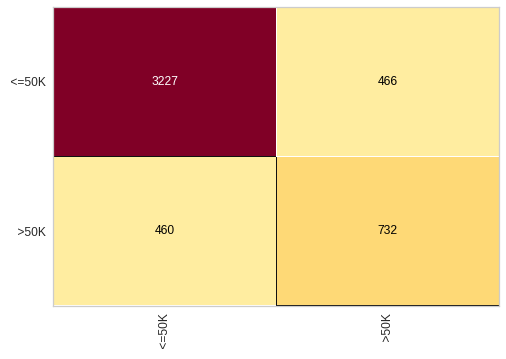

In [15]:
cm = ConfusionMatrix(arvore_census)
cm.fit(x_census_treinamento,y_census_treinamento)
cm.score(x_census_teste,y_census_teste)

In [17]:
print(classification_report(y_census_teste,previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885

